In [7]:
## importing basic libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Ingestion

In [8]:
data = pd.read_csv('HAM10000_metadata(1)')

In [ ]:
##Seeing the first heading dataset

In [12]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [27]:
data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset'],
      dtype='object')

In [26]:
data['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

# Description of the attributes

'lesion_id': a unique identifier for each individual skin lesion.

'image_id': a unique identifier for the image of the skin lesion.

'dx': the diagnosis label for the lesion, which can be one of seven different types (akiec, bcc, bkl, df, mel, nv, vasc).

'dx_type': the type of the diagnosis label, either 'histo' for histopathological or 'follow_up' for follow-up image.

'age': the age of the patient at the time the image was taken.

'sex': the sex of the patient.

'localization': the location on the body where the lesion is present.

'dataset': the source dataset of the image, either 'HAM10000' or 'ISIC2018'.

# Checking Unique values per column

In [28]:
for i in data.columns:
  print(f'The name of columns is  {i}')
  print(f'The unique value of the columns are {data[i].unique()}')
  print('*************************')

The name of columns is  lesion_id
The unique value of the columns are ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
*************************
The name of columns is  image_id
The unique value of the columns are ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
*************************
The name of columns is  dx
The unique value of the columns are ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
*************************
The name of columns is  dx_type
The unique value of the columns are ['histo' 'consensus' 'confocal' 'follow_up']
*************************
The name of columns is  age
The unique value of the columns are [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
*************************
The name of columns is  sex
The unique value of the columns are ['male' 'female' 'unknown']
*************************
The name of columns is  localization
The unique value of the 

### Categorical value and numerical value separation

In [29]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [30]:
categorical_feature

['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization', 'dataset']

In [31]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!='O']

In [32]:
numerical_feature

['age']

**Observation**: Only age is numerical value, others are categorical values.

# Analysis of the variable

In [33]:
data['age'].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

/home/rajan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

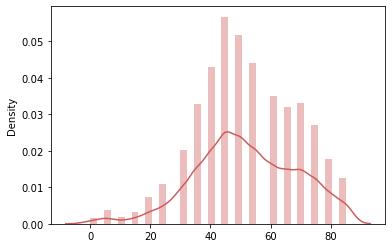

In [34]:
sns.distplot(x=data['age'], color='indianred')

Observation: Age variable is left skewed. So, outliers exists at the left

In [35]:
data['age'].isnull().sum()

57

Observation: 57 null value exist

## Analysis of categorical values

In [37]:
for i in categorical_feature:
  print(f'The name of columns is  {i}')
  print(f'The unique value of the columns are {data[i].unique()}')
  print('*************************')

The name of columns is  lesion_id
The unique value of the columns are ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
*************************
The name of columns is  image_id
The unique value of the columns are ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
*************************
The name of columns is  dx
The unique value of the columns are ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
*************************
The name of columns is  dx_type
The unique value of the columns are ['histo' 'consensus' 'confocal' 'follow_up']
*************************
The name of columns is  sex
The unique value of the columns are ['male' 'female' 'unknown']
*************************
The name of columns is  localization
The unique value of the columns are ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
***************

In [38]:
data['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [39]:
data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [17]:
(len(data))

10015

In [40]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

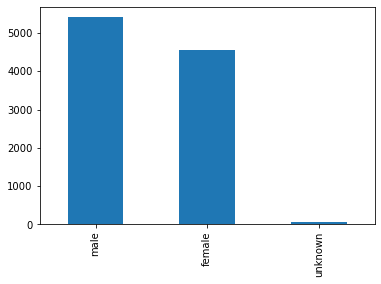

In [41]:
data['sex'].value_counts().plot(kind='bar');


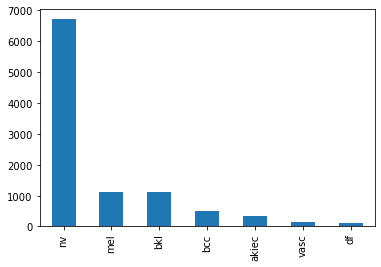

In [42]:
data['dx'].value_counts().plot(kind='bar');


Observation: nv is profoundly found in our dataset

Observation: Data are highly imbalanced.

In [44]:
data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

## Explanation:
 * The labels 'bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec' are the seven different types of skin lesion found in the HAM10000 dataset.*

**'bkl'** stands for benign keratosis-like lesion. It is a common, benign skin condition characterized by scaly or crusty bumps.

**'nv'** stands for melanocytic nevi, which are benign tumors of the pigment cells that can appear as dark spots on the skin.

**'df'** stands for dermatofibroma, which is a benign skin growth that appears as a small, hard bump.
**'mel'** stands for malignant melanoma, which is a type of skin cancer that can appear as a dark, irregularly shaped spot or mole.

**'vasc'** stands for vascular lesion, which is a lesion related to blood vessels.

**'bcc'** stands for basal cell carcinoma, which is the most common type of skin cancer.

**'akiec'** stands for Actinic Keratosis, which is a precancerous lesion that appears as a scaly or crusty bump, often caused by prolonged sun exposure.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [47]:
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

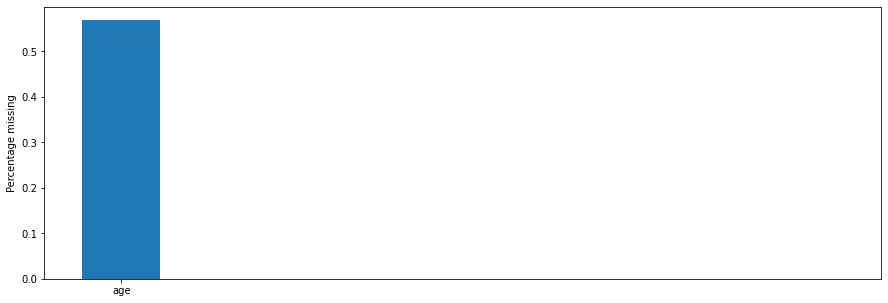

In [48]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks(['age'])
plt.ylabel("Percentage missing")
plt.ylabel
plt.show()

Observation: The missing value is in negligible ammount.

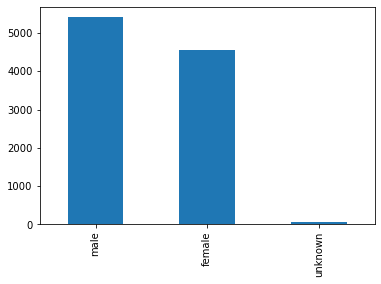

In [49]:
data['sex'].value_counts().plot(kind='bar');

Observation: Unknown is ambigous value.

In [50]:
data['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [51]:
data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

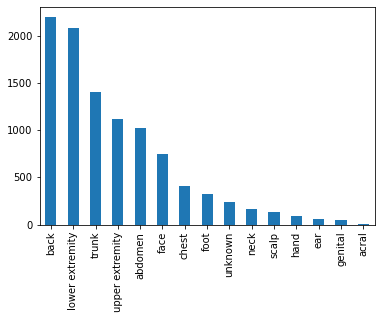

In [52]:
data['localization'].value_counts().plot(kind='bar');


Observation: Dataset is imbalanced.

# Feature Engineering

In [55]:
data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [56]:
df= data.copy()

#  reomoving the dataset with 'Sex' unknown.

In [59]:
df = df[df['sex']!='unknown']

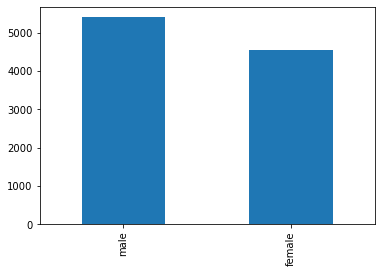

In [60]:
df['sex'].value_counts().plot(kind='bar');


In [61]:
len(df)

9958

In [62]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             10
sex              0
localization     0
dataset          0
dtype: int64

In [63]:
df['age'].describe()

count    9948.000000
mean       51.878267
std        16.957802
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

In [64]:
#the null value of age is very less --just 10

# Filling null values.

In [86]:
df['age'].fillna(df['age'].median(), inplace = True)

In [87]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [88]:
df['localization'].value_counts()

back               2190
lower extremity    2077
trunk              1401
upper extremity    1118
abdomen            1020
face                745
chest               407
foot                316
unknown             187
neck                168
scalp               128
hand                 90
Name: localization, dtype: int64

In [89]:
dff = df.copy()

In [90]:
rare_value_list = ['ear', 'genital', 'acral']

## Removing the rare value of location

In [91]:
for i in rare_value_list:
    df = df[df['localization']!=i]
    


In [92]:
df['localization'].value_counts()

back               2190
lower extremity    2077
trunk              1401
upper extremity    1118
abdomen            1020
face                745
chest               407
foot                316
unknown             187
neck                168
scalp               128
hand                 90
Name: localization, dtype: int64

## Removing unwanted columns

In [95]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern


In [97]:
df.drop(['lesion_id','dx_type','dataset'], axis = 1)

,image_id,dx,age,sex,localization
0,ISIC_0027419,bkl,80.0,male,scalp
1,ISIC_0025030,bkl,80.0,male,scalp
2,ISIC_0026769,bkl,80.0,male,scalp
3,ISIC_0025661,bkl,80.0,male,scalp
6,ISIC_0029176,bkl,60.0,male,face
...,...,...,...,...,...
10010,ISIC_0033084,akiec,40.0,male,abdomen
10011,ISIC_0033550,akiec,40.0,male,abdomen
10012,ISIC_0033536,akiec,40.0,male,abdomen
10013,ISIC_0032854,akiec,80.0,male,face


In [98]:
df.to_csv('curated_dataset.csv')

In [93]:
df.to_csv('updated_dataset.csv')

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
...,...,...,...,...,...,...,...,...,...
9842,10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
9843,10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
9844,10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
9845,10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern
